In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\saira\Desktop\Healthify App\Datasets\kidney_disease.csv")

In [3]:
df.head(10)

,age,bp,su,rbc,bu,hemo,wc,rc,classification
0,48.0,80.0,0.0,NaN,36.0,15.4,7800,5.2,ckd
1,7.0,50.0,0.0,NaN,18.0,11.3,6000,NaN,ckd
2,62.0,80.0,3.0,normal,53.0,9.6,7500,NaN,ckd
3,48.0,70.0,0.0,normal,56.0,11.2,6700,3.9,ckd
4,51.0,80.0,0.0,normal,26.0,11.6,7300,4.6,ckd
5,60.0,90.0,0.0,NaN,25.0,12.2,7800,4.4,ckd
6,68.0,70.0,0.0,NaN,54.0,12.4,NaN,NaN,ckd
7,24.0,NaN,4.0,normal,31.0,12.4,6900,5,ckd
8,52.0,100.0,0.0,normal,60.0,10.8,9600,4,ckd
9,53.0,90.0,0.0,abnormal,107.0,9.5,12100,3.7,ckd


In [4]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [5]:
df.shape

(400, 9)

In [6]:
df.head()

,age,bp,su,rbc,bu,hemo,wc,rc,classification
0,48.0,80.0,0.0,NaN,36.0,15.4,7800,5.2,ckd
1,7.0,50.0,0.0,NaN,18.0,11.3,6000,NaN,ckd
2,62.0,80.0,3.0,normal,53.0,9.6,7500,NaN,ckd
3,48.0,70.0,0.0,normal,56.0,11.2,6700,3.9,ckd
4,51.0,80.0,0.0,normal,26.0,11.6,7300,4.6,ckd


In [7]:
df.head()

,age,bp,su,rbc,bu,hemo,wc,rc,classification
0,48.0,80.0,0.0,NaN,36.0,15.4,7800,5.2,ckd
1,7.0,50.0,0.0,NaN,18.0,11.3,6000,NaN,ckd
2,62.0,80.0,3.0,normal,53.0,9.6,7500,NaN,ckd
3,48.0,70.0,0.0,normal,56.0,11.2,6700,3.9,ckd
4,51.0,80.0,0.0,normal,26.0,11.6,7300,4.6,ckd


In [8]:
df.describe()

,age,bp,su,bu,hemo
count,391.000000,388.000000,351.000000,381.000000,348.000000
mean,51.483376,76.469072,0.450142,57.425722,12.526437
std,17.169714,13.683637,1.099191,50.503006,2.912587
min,2.000000,50.000000,0.000000,1.500000,3.100000
25%,42.000000,70.000000,0.000000,27.000000,10.300000
50%,55.000000,80.000000,0.000000,42.000000,12.650000
75%,64.500000,80.000000,0.000000,66.000000,15.000000
max,90.000000,180.000000,5.000000,391.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   su              351 non-null    float64
 3   rbc             248 non-null    object 
 4   bu              381 non-null    float64
 5   hemo            348 non-null    float64
 6   wc              295 non-null    object 
 7   rc              270 non-null    object 
 8   classification  400 non-null    object 
dtypes: float64(5), object(4)
memory usage: 28.2+ KB


In [10]:
df.columns = ['age', 'blood_pressure', 'sugar', 'red_blood_cells', 'blood_urea',
              'haemoglobin',  'white_blood_cell_count', 'red_blood_cell_count',
              'class']

In [11]:

df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     391 non-null    float64
 1   blood_pressure          388 non-null    float64
 2   sugar                   351 non-null    float64
 3   red_blood_cells         248 non-null    object 
 4   blood_urea              381 non-null    float64
 5   haemoglobin             348 non-null    float64
 6   white_blood_cell_count  294 non-null    float64
 7   red_blood_cell_count    269 non-null    float64
 8   class                   400 non-null    object 
dtypes: float64(7), object(2)
memory usage: 28.2+ KB


In [13]:
df.columns

Index(['age', 'blood_pressure', 'sugar', 'red_blood_cells', 'blood_urea',
       'haemoglobin', 'white_blood_cell_count', 'red_blood_cell_count',
       'class'],
      dtype='object')

In [14]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [15]:
cat_cols

['red_blood_cells', 'class']

In [16]:
num_cols

['age',
 'blood_pressure',
 'sugar',
 'blood_urea',
 'haemoglobin',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [17]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
class has ['ckd' 'ckd\t' 'notckd']


In [18]:


df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})

In [19]:
cols = ['class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

class has ['ckd' 'not ckd']


In [20]:
df['class'] = df['class'].map({'ckd':0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors = 'coerce')

In [21]:
cols = ['class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

class has [0 1]


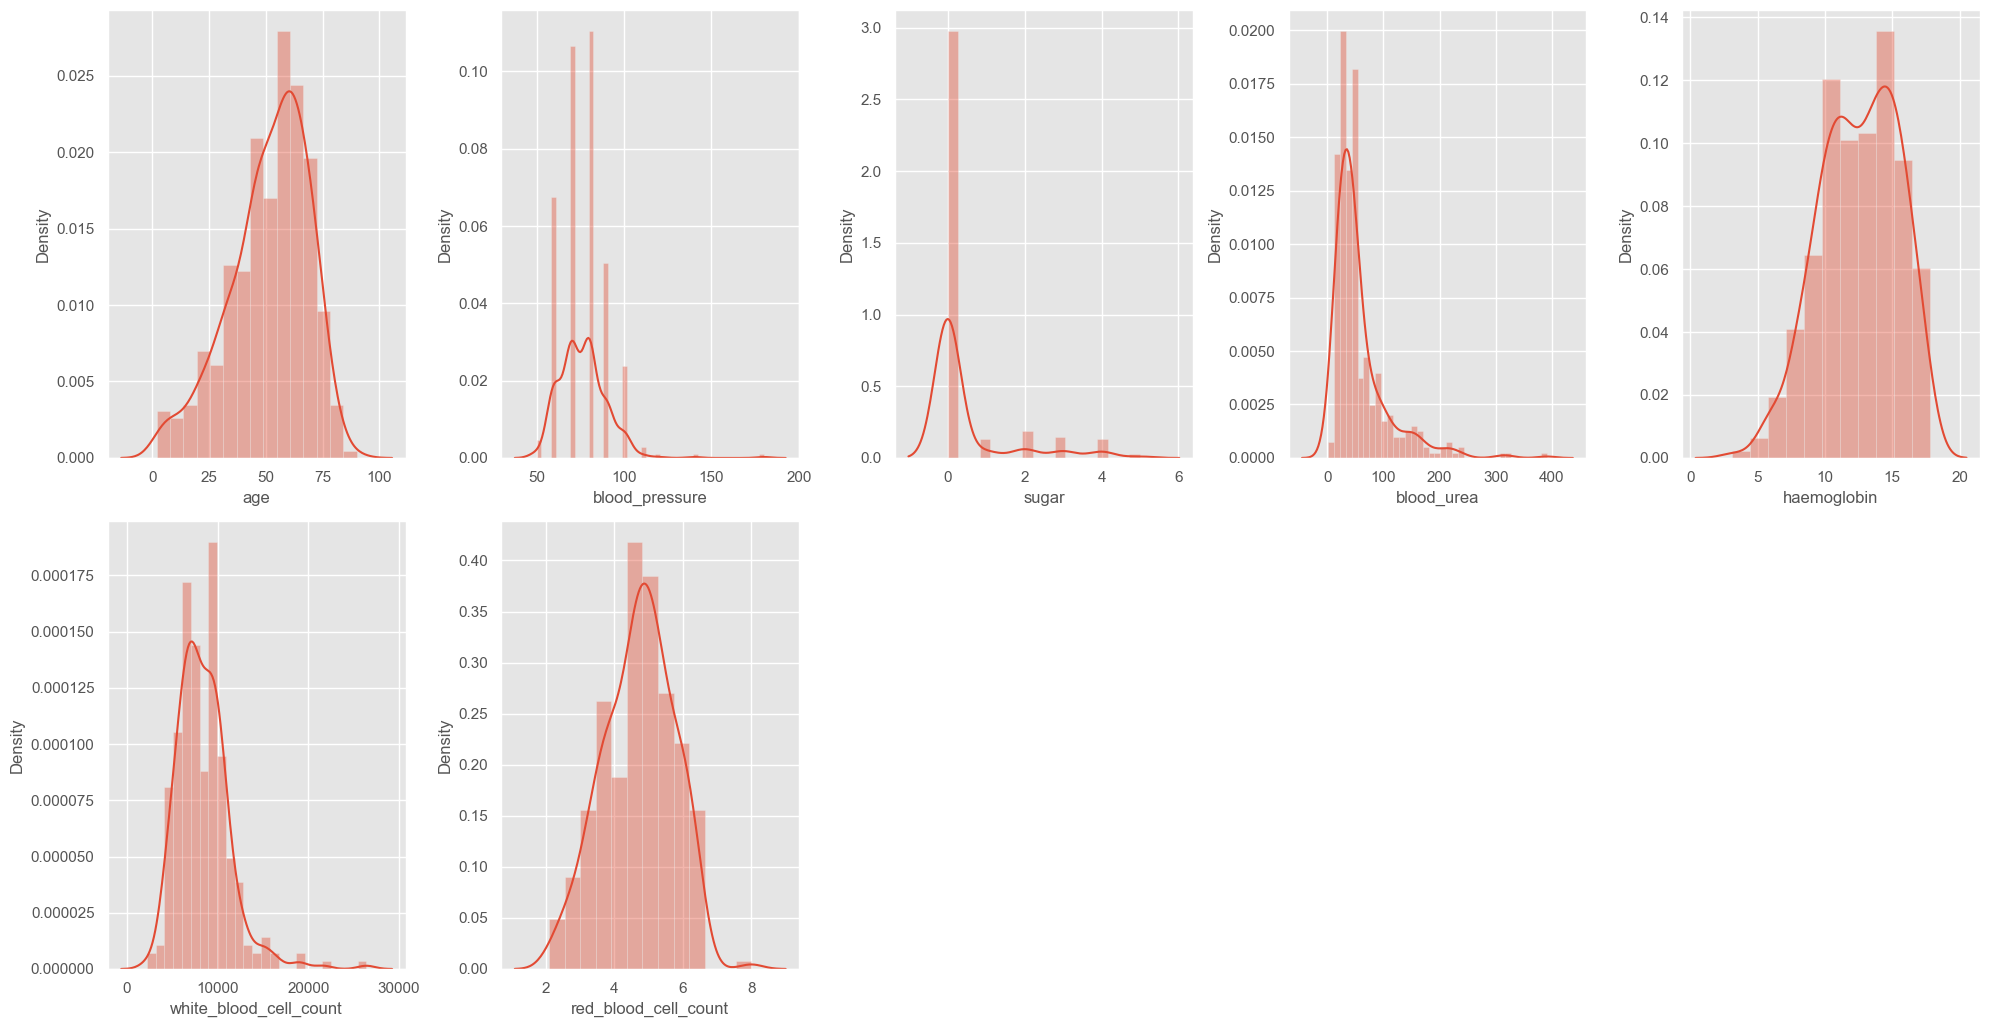

In [22]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

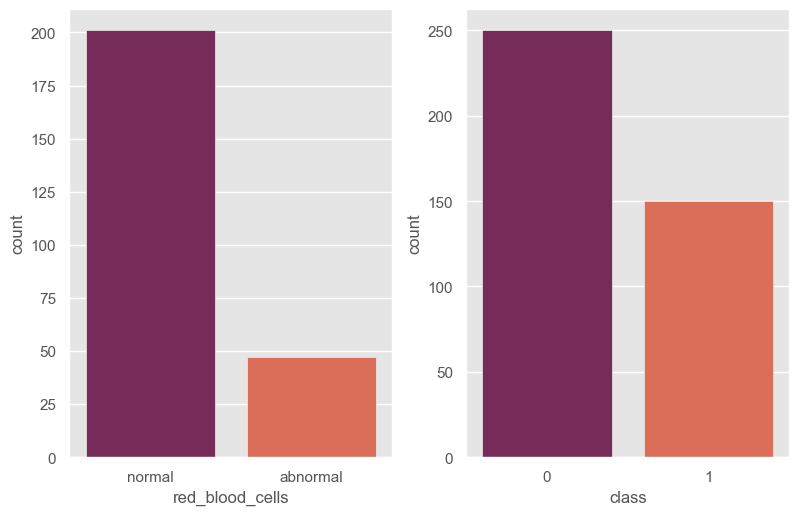

In [23]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        #sns.countplot(df[column] ,palette = 'rocket')
        sns.countplot(data=df, x=column, palette='rocket')

        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [24]:
print(df[column].dtype)


int64


In [30]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)



                             age  blood_pressure     sugar  blood_urea  \
age                     1.000000        0.159480  0.220866    0.196985   
blood_pressure          0.159480        1.000000  0.222576    0.188517   
sugar                   0.220866        0.222576  1.000000    0.168583   
blood_urea              0.196985        0.188517  0.168583    1.000000   
haemoglobin            -0.192928       -0.306540 -0.224775   -0.610360   
white_blood_cell_count  0.118339        0.029753  0.184893    0.050462   
red_blood_cell_count   -0.268896       -0.261936 -0.237448   -0.579087   
class                  -0.227268       -0.294077 -0.344070   -0.380605   

                        haemoglobin  white_blood_cell_count  \
age                       -0.192928                0.118339   
blood_pressure            -0.306540                0.029753   
sugar                     -0.224775                0.184893   
blood_urea                -0.610360                0.050462   
haemoglobin       

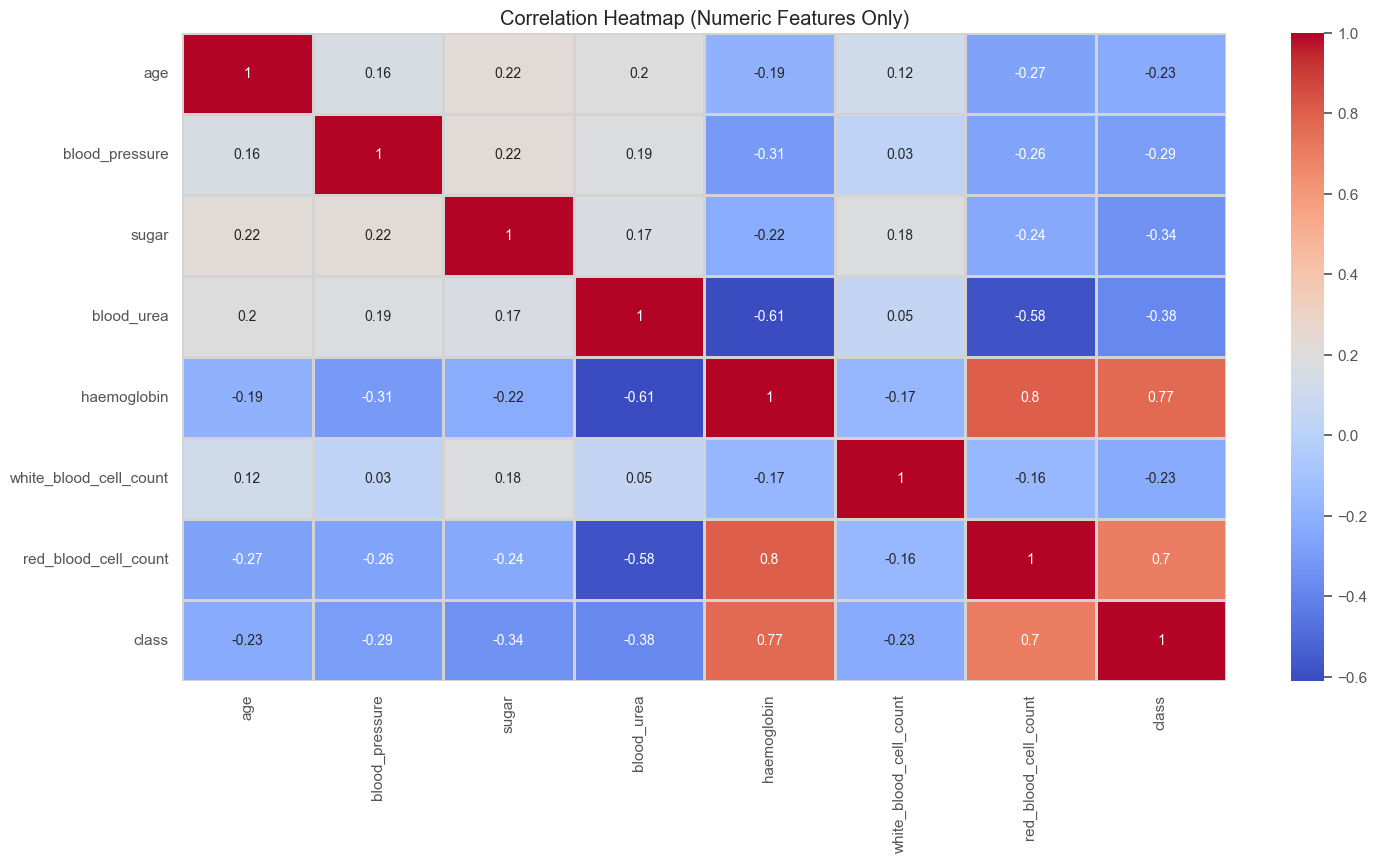

In [31]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_numeric.corr(), annot=True, linewidths=2, linecolor='lightgray', cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [32]:
# EDA

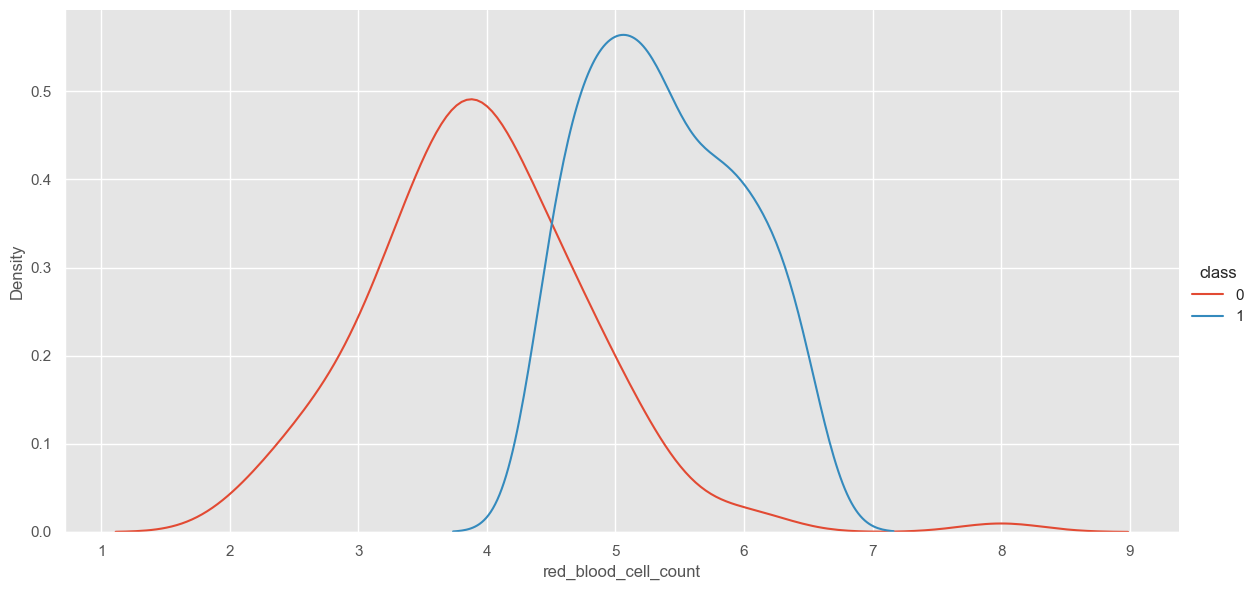

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the column is numeric
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

def kde(col):
    grid = sns.FacetGrid(df, hue='class', height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

kde('red_blood_cell_count')


In [34]:
def voilin(col):
    fig  = px.violin(df, y=col, x='class', color='class', box=True, template='plotly_dark')
    return fig.show()

# def kde(col):
#     grid = sns.FacetGrid(df, hue='class', height = 6, aspect = 2)
#     grid.map(sns.kdeplot, col)
#     grid.add_legend()
    
def scatter_plot(col1, col2):
    fig  = px.scatter(df, x=col1, y=col2, color="class",  template='plotly_dark')
    return fig.show()

In [35]:
#kde('red_blood_cell_count')

In [36]:
# Data Preprocessing

In [37]:
# checking for missing value
df.isnull().sum().sort_values(ascending=False)

red_blood_cells           152
red_blood_cell_count      131
white_blood_cell_count    106
haemoglobin                52
sugar                      49
blood_urea                 19
blood_pressure             12
age                         9
class                       0
dtype: int64

In [38]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
sugar                      49
blood_urea                 19
haemoglobin                52
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [39]:
df[cat_cols].isnull().sum()

red_blood_cells    152
class                0
dtype: int64

In [40]:
df.head()

,age,blood_pressure,sugar,red_blood_cells,blood_urea,haemoglobin,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,0.0,NaN,36.0,15.4,7800.0,5.2,0
1,7.0,50.0,0.0,NaN,18.0,11.3,6000.0,NaN,0
2,62.0,80.0,3.0,normal,53.0,9.6,7500.0,NaN,0
3,48.0,70.0,0.0,normal,56.0,11.2,6700.0,3.9,0
4,51.0,80.0,0.0,normal,26.0,11.6,7300.0,4.6,0


In [41]:
# two method
# radom sampling->higer null value
# mean/mode-> lower null value

In [42]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [43]:
# random sampling for numerical value
for col in num_cols:
    random_sampling(col)

In [44]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
sugar                     0
blood_urea                0
haemoglobin               0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [45]:
random_sampling('red_blood_cells')


for col in cat_cols:
    impute_mode(col)

In [46]:
df[cat_cols].isnull().sum()

red_blood_cells    0
class              0
dtype: int64

In [47]:
# Feature Encoding

In [48]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()}")

red_blood_cells has 2
class has 2


In [49]:
# label_encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [50]:
df.head()

,age,blood_pressure,sugar,red_blood_cells,blood_urea,haemoglobin,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,0.0,1,36.0,15.4,7800.0,5.2,0
1,7.0,50.0,0.0,1,18.0,11.3,6000.0,6.4,0
2,62.0,80.0,3.0,1,53.0,9.6,7500.0,4.6,0
3,48.0,70.0,0.0,1,56.0,11.2,6700.0,3.9,0
4,51.0,80.0,0.0,1,26.0,11.6,7300.0,4.6,0


In [51]:
# Model Building

In [52]:
X = df.drop('class', axis = 1)
y = df['class']

In [53]:
df.to_csv("data.csv")

In [54]:
X.columns

Index(['age', 'blood_pressure', 'sugar', 'red_blood_cells', 'blood_urea',
       'haemoglobin', 'white_blood_cell_count', 'red_blood_cell_count'],
      dtype='object')

In [55]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [57]:
# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test))}")

print(f"Confusion Matrix of KNN is \n {confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report of KNN is \n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.771875
Testing Accuracy of KNN is 0.6125
Confusion Matrix of KNN is 
 [[37 15]
 [16 12]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.70      0.71      0.70        52
           1       0.44      0.43      0.44        28

    accuracy                           0.61        80
   macro avg       0.57      0.57      0.57        80
weighted avg       0.61      0.61      0.61        80



In [59]:
# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 0.9125
Confusion Matrix of DTC is 
 [[47  5]
 [ 2 26]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [62]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, GRID_PARAMETER, cv=5, n_jobs=-1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [64]:
# best paramer and best score
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.946875


In [65]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 0.965625
Testing Accuracy of DTC is 0.925
Confusion Matrix of DTC is 
 [[46  6]
 [ 0 28]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        52
           1       0.82      1.00      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



In [66]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators = 400)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [67]:
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(f"Training Accuracy of Random Forest is {accuracy_score(y_train, rand_clf.predict(X_train))}")
print(f"Testing Accuracy of Random Forest is {accuracy_score(y_test, rand_clf.predict(X_test))}")

print(f"Confusion Matrix of Random Forest is \n {confusion_matrix(y_test, rand_clf.predict(X_test))}\n")
print(f"Classification Report of Random Forest is \n{classification_report(y_test, rand_clf.predict(X_test))}")

Training Accuracy of Random Forest is 0.971875
Testing Accuracy of Random Forest is 0.975
Confusion Matrix of Random Forest is 
 [[50  2]
 [ 0 28]]

Classification Report of Random Forest is 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
xgb = XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.01,
    max_depth=10, 
    n_estimators=100,
    eval_metric="logloss"
)

# Train the model
xgb.fit(X_train, y_train)

# Predict on test data
y_pred = xgb.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9750


In [70]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XGB is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy of XGB is {accuracy_score(y_test, xgb.predict(X_test))}")

print(f"Confusion Matrix of XGB is \n {confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report of XGB is \n{classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XGB is 0.95
Testing Accuracy of XGB is 0.975
Confusion Matrix of XGB is 
 [[50  2]
 [ 0 28]]

Classification Report of XGB is 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [72]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Training Accuracy of LR is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy of LR is {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Confusion Matrix of LR is \n {confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Classification Report of LR is \n{classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of LR is 0.8875
Testing Accuracy of LR is 0.9
Confusion Matrix of LR is 
 [[47  5]
 [ 3 25]]

Classification Report of LR is 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



In [73]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm  = SVC(probability=True)

parameter = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svm, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [74]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.001}
0.66875


In [75]:
svm  = SVC(gamma = 0.0001, C  = 15, probability=True)
svm.fit(X_train, y_train)

SVC(C=15, gamma=0.0001, probability=True)

In [76]:
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print(f"Training Accuracy of SVC is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Testing Accuracy of SVC is {accuracy_score(y_test, svm.predict(X_test))}")

print(f"Confusion Matrix of SVC is \n {confusion_matrix(y_test, svm.predict(X_test))}\n")
print(f"Classification Report of SVC is \n{classification_report(y_test, svm.predict(X_test))}")

Training Accuracy of SVC is 0.9
Testing Accuracy of SVC is 0.6375
Confusion Matrix of SVC is 
 [[40 12]
 [17 11]]

Classification Report of SVC is 
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        52
           1       0.48      0.39      0.43        28

    accuracy                           0.64        80
   macro avg       0.59      0.58      0.58        80
weighted avg       0.62      0.64      0.63        80



In [77]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

PARAMETERS = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate':[0.001, 0.1, 1, 10],
    'n_estimators':[100,150,180, 200]
}
grid_search_gbc = GridSearchCV(gbc, PARAMETERS, cv=5, n_jobs=-1, verbose= 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [78]:
print(grid_search_gbc.best_params_)

{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 200}


In [79]:
print(grid_search_gbc.best_score_)

0.921875


In [80]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, loss = 'log_loss', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [81]:
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(f"Training Accuracy of GBC is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Testing Accuracy of GBC is {accuracy_score(y_test, gbc.predict(X_test))}")

print(f"Confusion Matrix of GBC is \n {confusion_matrix(y_test, gbc.predict(X_test))}\n")
print(f"Classification Report of GBC is \n{classification_report(y_test, gbc.predict(X_test))}")

Training Accuracy of GBC is 1.0
Testing Accuracy of GBC is 0.9375
Confusion Matrix of GBC is 
 [[48  4]
 [ 1 27]]

Classification Report of GBC is 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [82]:
# Model Comparison

models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'SVM', 'DT', 'Random Forest Classifier', 'XgBoost','Gradient Boosting'],
    'Score':[lr_acc, knn_acc, svm_acc, dtc_acc, rand_clf_acc, xgb_acc, gbc_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
4,Random Forest Classifier,0.9750
5,XgBoost,0.9750
6,Gradient Boosting,0.9375
3,DT,0.9250
0,Logistic Regression,0.9000
2,SVM,0.6375
1,KNN,0.6125


In [83]:
import pickle
model = dtc
pickle.dump(model, open("kindey.pkl", 'wb'))

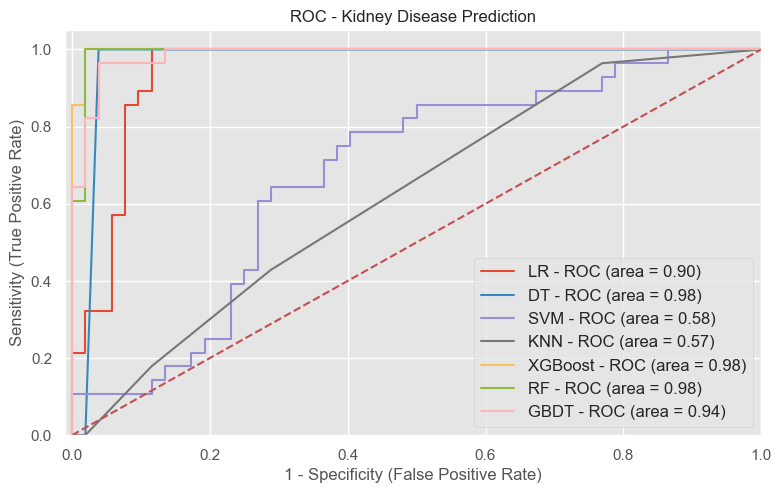

In [84]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[90.0, 92.5, 63.74999999999999, 61.25000000000001, 97.5, 97.5, 93.75]
[89.84, 96.15, 58.099999999999994, 57.010000000000005, 98.08, 98.08, 94.37]


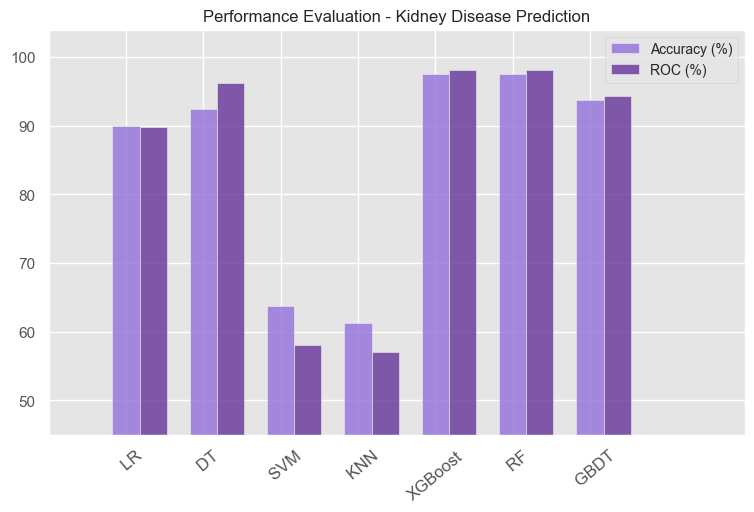

In [85]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svm_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)


n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)


fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()